#Decision Tree

###Neste notebook serão descritas as etapas adotadas para a aplicação do algoritmo Decision Tree para a predição de falhas da máquina utilizando o dataset preparado na etapa de ETL.

###Serão testados 3 modelos de árvores de decisão, sendo um com os dados "puros" e outros dois com a aplicação de técnicas de balanceamento de dados.

In [ ]:
# Importando as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

In [ ]:
# Importando os dados de Treino e Teste:
dados_treino = pd.read_csv('https://raw.githubusercontent.com/monteiro-fernando/Projetos_Fatec/master/Dataset_CNC%20-%20TRAINING%20SET.csv')
dados_teste = pd.read_csv('https://raw.githubusercontent.com/monteiro-fernando/Projetos_Fatec/master/Dataset_CNC%20-%20TEST%20SET.csv')

In [ ]:
# Definindo as variáveis Features e Target para o treino:
features_treino = dados_treino.drop(['falha_amanha','data'], axis = 1)
target_treino = dados_treino.falha_amanha

In [ ]:
# Definindo as variáveis Features e Target para o teste:
features_teste = dados_teste.drop(['falha_amanha','data'], axis = 1)
target_teste = dados_teste.falha_amanha

#Análise prévia da variável Target:

###Antes de iniciar nossa predição através do algoritmo Decision Tree, vamos analisar a distribuição dos dados na nossa variável alvo "falha_amanha" para verificar se é necessário adotar alguma medida para que o nosso modelo não seja enviesado.

###Ao analisar os dados verificou-se que existem aproximadamente 3 vezes mais linhas com o valor 0.0, que seria a resposta "não", se comparado ao valor 1.0, que seria a resposta "sim". Isso pode ser um problema, pois o modelo estará propenso a aprender mais sobre a resposta "não" e se tornar enviesado.

In [ ]:
# Verificando a quantidade de cada resposta:
target_treino.value_counts()

0.0    2490
1.0     719
Name: falha_amanha, dtype: int64

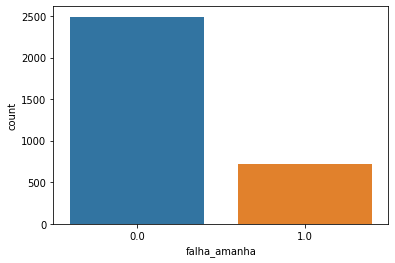

In [ ]:
# Visualizando graficamente a diferença entre a quantidade de respostas "não" e "sim":
ax = sns.countplot(x="falha_amanha", data=dados_treino)

#Modelo 1:

##Teste com os dados "puros", não balanceados.

In [ ]:
# Separando os dados de treino e teste através do método Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(features_treino, target_treino, random_state = 1, stratify=target_treino)

In [ ]:
# Treinando o modelo:
modelo_1 = DecisionTreeClassifier(min_samples_split= 15, random_state= 1, max_depth=3)
modelo_1 = modelo_1.fit(X_train, y_train)

In [ ]:
# Gerando nossa predição:
predicao_treino = modelo_1.predict(X_test)

## Verificando a acurácia do modelo durante o Treino

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(y_test, predicao_treino)

0.7770859277708593

In [ ]:
# Relatório de Classificação:
print (classification_report(y_test, predicao_treino))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       623
         1.0       0.51      0.19      0.28       180

    accuracy                           0.78       803
   macro avg       0.65      0.57      0.57       803
weighted avg       0.74      0.78      0.74       803



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(y_test, predicao_treino, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0  All
Real                  
0.0      589   34  623
1.0      145   35  180
All      734   69  803


## Verificando a acurácia do modelo com dados desconhecidos (Test Set)

In [ ]:
# Gerando nossa predição:
predicao_teste = modelo_1.predict(features_teste)

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(target_teste, predicao_teste)

0.7976878612716763

In [ ]:
# Relatório de Classificação:
print (classification_report(target_teste, predicao_teste))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       141
         1.0       0.33      0.09      0.15        32

    accuracy                           0.80       173
   macro avg       0.58      0.53      0.52       173
weighted avg       0.73      0.80      0.75       173



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(target_teste, predicao_teste, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0  All
Real                  
0.0      135    6  141
1.0       29    3   32
All      164    9  173


##Visualizando o Modelo:

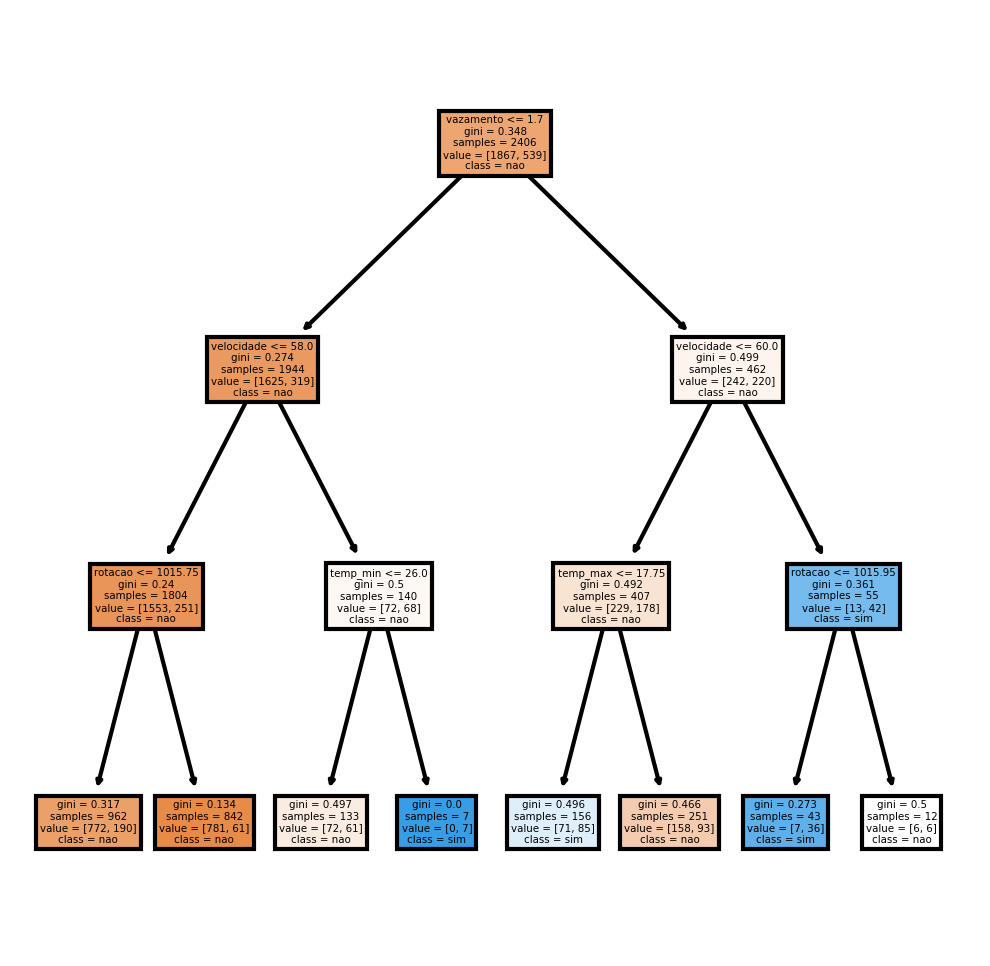

In [ ]:
fn=['temp_min','temp_max','vazamento','velocidade','rotacao','falha_hoje']
cn=['nao', 'sim']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(modelo_1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('modelo1.png')

#Modelo 2:

##Teste com dados balanceados com o método de undersampling NearMiss.

###Esse método iguala a quantidade de classes "sim" e "não".

In [ ]:
# Definindo as variáveis Features e Target para o treino:
features_treino = dados_treino.drop(['falha_amanha','data'], axis = 1)
target_treino = dados_treino.falha_amanha

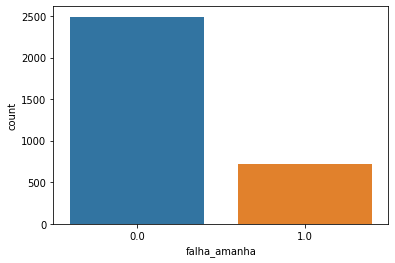

In [ ]:
# Visualizando graficamente a diferença entre a quantidade de respostas "não" e "sim":
ax = sns.countplot(x="falha_amanha", data=dados_treino)

In [ ]:
# Aplicando o método NearMiss:
nr = NearMiss()
features_treino, target_treino = nr.fit_sample(features_treino, target_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


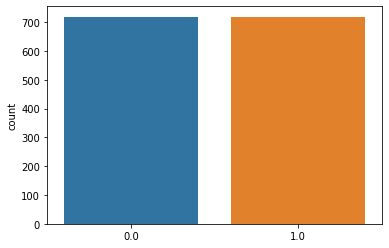

In [ ]:
# Visualizando graficamente a quantidade de dados "não" e "sim" após a aplicação do método NearMiss:
ax = sns.countplot(x=target_treino)

In [ ]:
# Separando os dados de treino e teste:
X_train, X_test, y_train, y_test = train_test_split(features_treino, target_treino, random_state = 1, stratify=target_treino)

In [ ]:
# Treinando o modelo:
modelo_2 = DecisionTreeClassifier(min_samples_split= 15, random_state= 1, max_depth=3)
modelo_2 = modelo_2.fit(X_train, y_train)

In [ ]:
# Gerando nossa predição:
predicao_treino = modelo_2.predict(X_test)

## Verificando a acurácia do modelo durante o Treino

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(y_test, predicao_treino)

0.75

In [ ]:
# Relatório de Classificação:
print (classification_report(y_test, predicao_treino))

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       180
         1.0       0.78      0.69      0.73       180

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(y_test, predicao_treino, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0  All
Real                  
0.0      146   34  180
1.0       56  124  180
All      202  158  360


## Verificando a acurácia do modelo com dados desconhecidos (Test Set)

In [ ]:
# Gerando nossa predição:
predicao_teste = modelo_2.predict(features_teste)

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(target_teste, predicao_teste)

0.7283236994219653

In [ ]:
# Relatório de Classificação:
print (classification_report(target_teste, predicao_teste))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       141
         1.0       0.37      0.69      0.48        32

    accuracy                           0.73       173
   macro avg       0.64      0.71      0.65       173
weighted avg       0.81      0.73      0.75       173



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(target_teste, predicao_teste, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0  All
Real                  
0.0      104   37  141
1.0       10   22   32
All      114   59  173


## Visualizando o Modelo:

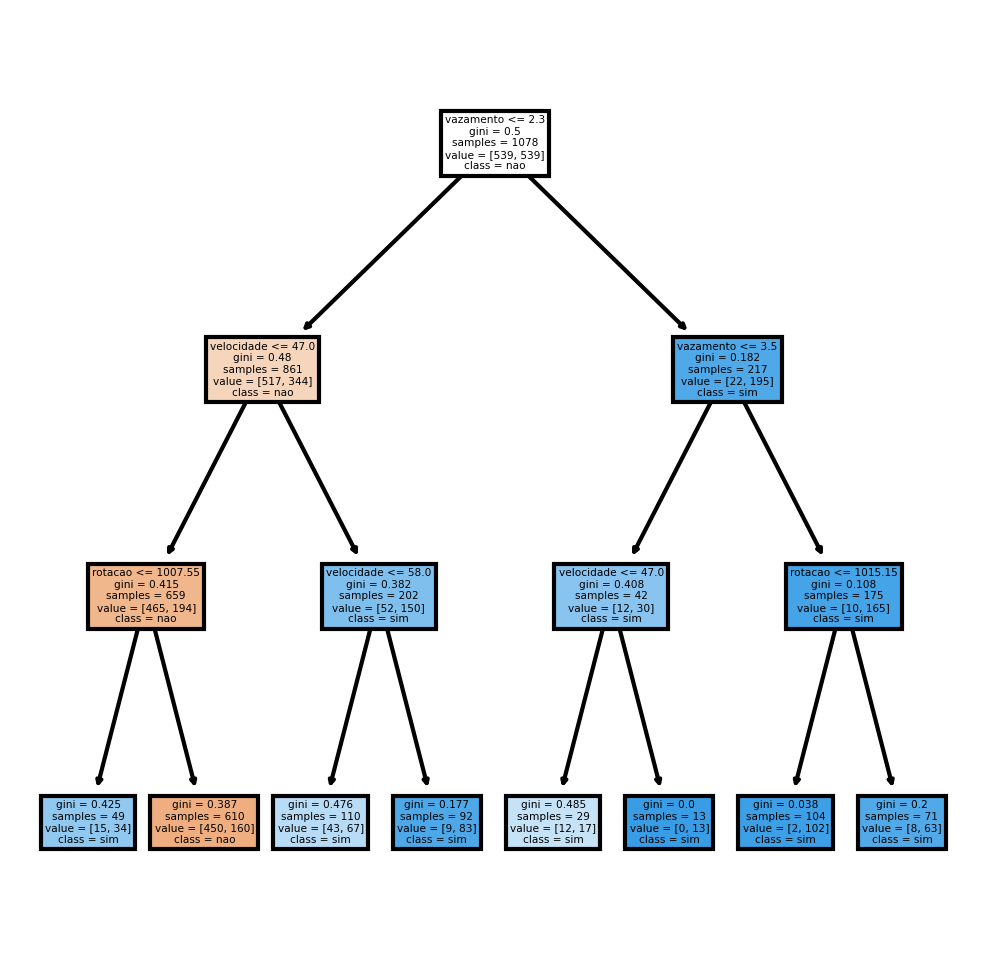

In [ ]:
fn=['temp_min','temp_max','vazamento','velocidade','rotacao','falha_hoje']
cn=['nao', 'sim']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(modelo_2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('modelo2.png')

#Modelo 3:

##Teste com dados balanceados com o método SMOTE (Synthetic Minority Over-sampling Technique).

###Esse método gera dados sintéticos da classe minoritária.

In [ ]:
# Definindo as variáveis Features e Target para o treino:
features_treino = dados_treino.drop(['falha_amanha','data'], axis = 1)
target_treino = dados_treino.falha_amanha

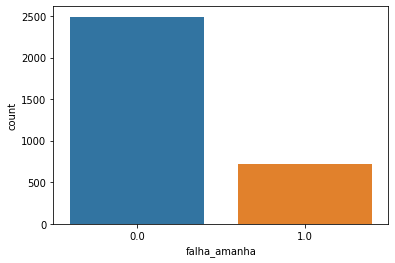

In [ ]:
# Visualizando graficamente a diferença entre a quantidade de respostas "não" e "sim":
ax = sns.countplot(x="falha_amanha", data=dados_treino)

In [ ]:
# Aplicando o método SMOTE:
smt = SMOTE()
features_treino, target_treino = smt.fit_sample(features_treino, target_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


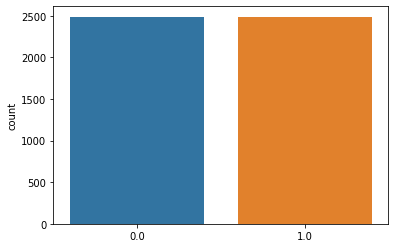

In [ ]:
# Visualizando graficamente a quantidade de dados "não" e "sim" após a aplicação do método SMOTE:
ax = sns.countplot(x=target_treino)

In [ ]:
# Separando os dados de treino e teste:
X_train, X_test, y_train, y_test = train_test_split(features_treino, target_treino, random_state = 1, stratify=target_treino)

In [ ]:
# Treinando o modelo:
modelo_3 = DecisionTreeClassifier(min_samples_split= 15, random_state= 1, max_depth=3)
modelo_3 = modelo_3.fit(X_train, y_train)

In [ ]:
# Gerando nossa predição:
predicao_treino = modelo_3.predict(X_test)

## Verificando a acurácia do modelo durante o Treino

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(y_test, predicao_treino)

0.7196787148594378

In [ ]:
# Relatório de Classificação:
print (classification_report(y_test, predicao_treino))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       622
         1.0       0.74      0.69      0.71       623

    accuracy                           0.72      1245
   macro avg       0.72      0.72      0.72      1245
weighted avg       0.72      0.72      0.72      1245



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(y_test, predicao_treino, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0   All
Real                   
0.0      468  154   622
1.0      195  428   623
All      663  582  1245


## Verificando a acurácia do modelo com dados desconhecidos (Test Set)

In [ ]:
# Gerando nossa predição:
predicao_teste = modelo_3.predict(features_teste)

In [ ]:
# Verificando a acurácia do modelo:
accuracy_score(target_teste, predicao_teste)

0.7456647398843931

In [ ]:
# Relatório de Classificação:
print (classification_report(target_teste, predicao_teste))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       141
         1.0       0.38      0.59      0.46        32

    accuracy                           0.75       173
   macro avg       0.64      0.69      0.65       173
weighted avg       0.80      0.75      0.76       173



In [ ]:
# Matriz de Confusão:
print (pd.crosstab(target_teste, predicao_teste, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0  1.0  All
Real                  
0.0      110   31  141
1.0       13   19   32
All      123   50  173


##Visualizando o modelo:

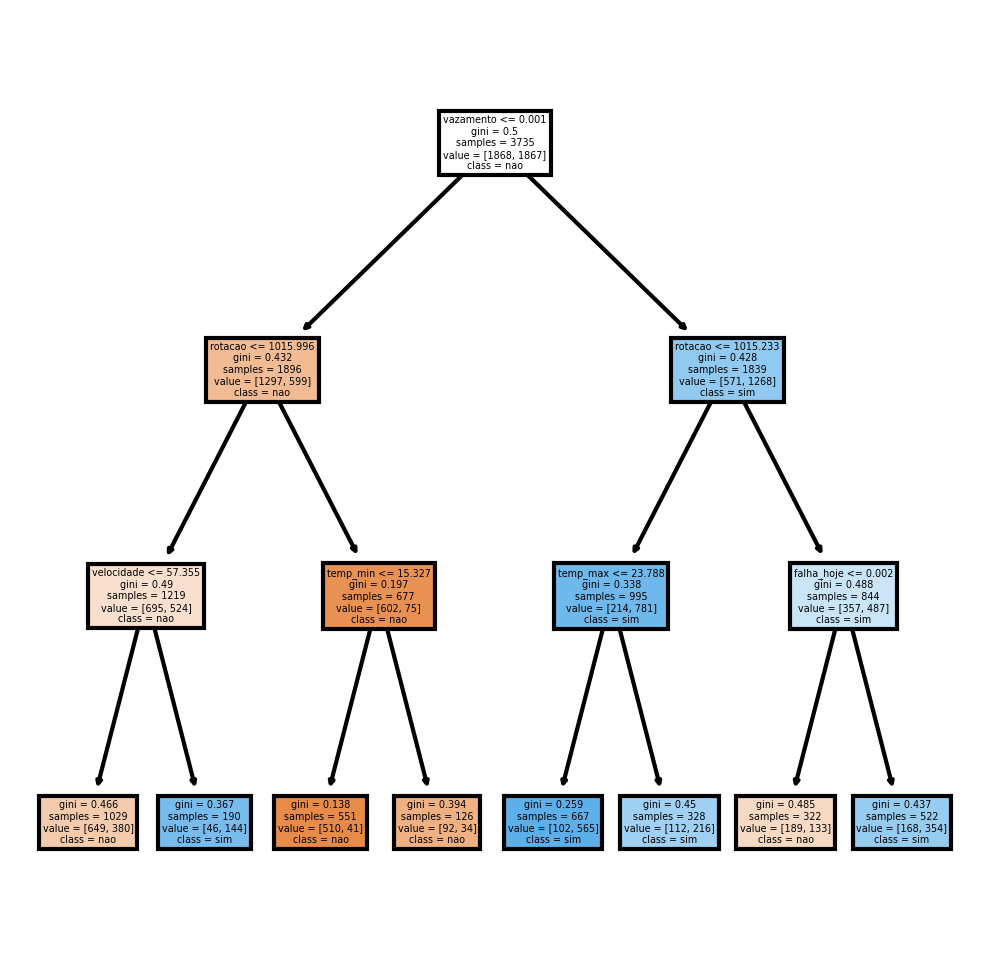

In [ ]:
fn=['temp_min','temp_max','vazamento','velocidade','rotacao','falha_hoje']
cn=['nao', 'sim']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(modelo_3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('modelo3.png')

# Conclusão

###Analisando os resultados dos 3 modelos verificou-se o seguinte:

### Modelo 1 - Dados Puros:
- Acurácia: 80%;
- Recall: resposta "não"= 96% de acertos e resposta "sim"= 9% de acertos;
- Macro Avg: 53% (média do percentual de acerto das duas classes "não" e "sim").

### Modelo 2 - Técnica NearMiss (Undersampling):
- Acurácia: 73%;
- Recall: resposta "não"= 74% de acertos e resposta "sim"= 69% de acertos;
- Macro Avg: 71% (média do percentual de acerto das duas classes "não" e "sim").

### Modelo 3 - Técnica SMOTE (Oversampling):
- Acurácia: 69%;
- Recall: resposta "não"= 70% de acertos e resposta "sim"= 66% de acertos;
- Macro Avg: 68% (média do percentual de acerto das duas classes "não" e "sim").

### Escolha do melhor modelo:

Optou-se pela escolha do Modelo 2 como o melhor modelo pois, apesar de apresentar a segunda melhor acurácia entre os 3, este foi o modelo que apresentou o melhor equilíbrio na predição das duas classes "não" e "sim", com 74% de acertos para a classe "não" e 69% de acerto para a classe "sim". Apresentando também a melhor Macro Avg entre os 3, com 71%.

O modelo 1, apesar de apresentar a melhor acurácia geral, com 80%, acabou se tornando bastante enviesado, apresentando grande precisão de predição apenas para a classe "não".